<a href="https://colab.research.google.com/github/FraGoTe/Analisis-Estadistico-Textos/blob/master/ClassificationBayesianMN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


## **Importar las librerías**

In [0]:
import numpy as np
import pandas as pd

.

.

.

##**Cargar dataset**

In [0]:
from google.colab import files
uploaded = files.upload()

Saving emailspam.csv to emailspam (1).csv


In [0]:
import io
dataset = pd.read_csv(io.BytesIO(uploaded['emailspam.csv']))
dataset.head()

,Mail,Class
0,component,0
1,Offer expires,1
2,One hundred percent guaranteed,1
3,concept,0
4,brief,0


.

.

.

##**Ver frecuencias de clase**

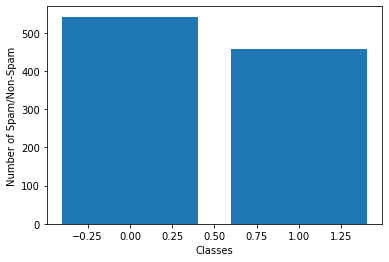

In [0]:
spam_count=dataset.groupby('Class').count()
from matplotlib import pyplot as plt
plt.bar(spam_count.index.values, spam_count['Mail'])
plt.xlabel('Classes')
plt.ylabel('Number of Spam/Non-Spam')
plt.show()

.

.

.

.


##**Pre-procesamiento**

In [0]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import RegexpTokenizer
#Remover elementos no deseados del texto (símbolos y números)
token = RegexpTokenizer(r'[a-zA-Z0-9]+')
cv = CountVectorizer(lowercase=True,stop_words='english',ngram_range = (1,1),
                     tokenizer = token.tokenize)
text_counts= cv.fit_transform(dataset['Mail'])
print(text_counts)

  (0, 40)	1
  (1, 81)	1
  (1, 61)	1
  (2, 92)	1
  (2, 67)	1
  (3, 47)	1
  (4, 5)	1
  (5, 125)	1
  (5, 79)	1
  (6, 40)	1
  (7, 22)	1
  (8, 82)	1
  (8, 62)	1
  (8, 9)	1
  (9, 87)	1
  (9, 115)	1
  (9, 96)	1
  (9, 78)	1
  (10, 19)	1
  (11, 20)	1
  (12, 28)	1
  (13, 92)	1
  (13, 67)	1
  (14, 105)	1
  (14, 129)	1
  :	:
  (979, 93)	1
  (980, 32)	1
  (981, 41)	1
  (982, 101)	1
  (982, 98)	1
  (983, 88)	1
  (983, 126)	1
  (984, 99)	1
  (985, 28)	1
  (986, 77)	1
  (987, 40)	1
  (988, 108)	1
  (988, 102)	1
  (989, 19)	1
  (990, 41)	1
  (991, 25)	1
  (992, 20)	1
  (993, 36)	1
  (994, 72)	1
  (995, 50)	1
  (996, 83)	1
  (996, 93)	1
  (997, 40)	1
  (998, 18)	1
  (999, 39)	1


.

.

.

##**Clasificador Bayesiano**

Constriur los conjuntos de entrenamiento y prueba

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    text_counts, dataset['Class'], test_size=0.3, random_state=1)

print(X_train)

  (0, 49)	1
  (1, 106)	1
  (1, 68)	1
  (2, 107)	1
  (2, 71)	1
  (3, 17)	1
  (4, 107)	1
  (4, 71)	1
  (5, 118)	1
  (6, 1)	1
  (7, 2)	1
  (8, 84)	1
  (8, 83)	1
  (8, 3)	1
  (10, 92)	1
  (10, 67)	1
  (11, 27)	1
  (12, 1)	1
  (13, 40)	1
  (14, 22)	1
  (15, 32)	1
  (16, 42)	1
  (17, 29)	1
  (18, 88)	1
  (18, 126)	1
  :	:
  (687, 84)	1
  (687, 83)	1
  (687, 3)	1
  (688, 90)	1
  (688, 59)	1
  (689, 35)	1
  (690, 27)	1
  (691, 94)	1
  (691, 60)	1
  (692, 30)	1
  (693, 92)	1
  (693, 67)	1
  (694, 104)	1
  (694, 124)	1
  (695, 110)	1
  (695, 108)	1
  (695, 122)	1
  (696, 91)	1
  (696, 74)	1
  (696, 76)	1
  (696, 80)	1
  (696, 75)	1
  (697, 14)	1
  (698, 49)	1
  (699, 21)	1


Instanciar el clasificador Bayesiano

In [0]:
import nltk.classify.util
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix
from sklearn import metrics
#Entrenar el clasificador
clf = MultinomialNB().fit(X_train, y_train)

Probar la clasificacion del modelo. Devuelve una matriz de confusión que contiene a los [VP, FP, VN, FN]



In [0]:
y_pred= clf.predict(X_test)
m=confusion_matrix(y_test, y_pred)
print(m)
print("MultinomialNB Accuracy:",metrics.accuracy_score(y_test, y_pred))

[[139  11]
 [ 19 131]]
MultinomialNB Accuracy: 0.9
